In [33]:
from flowsom import flowsom as flowsom
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [34]:
tt = flowsom('/Users/smasarone/Desktop/demo_fcs/BD - FACS Aria II.fcs', if_fcs=True, if_drop=False)

In [35]:
tt_df = tt.df
tt_df.head()

,FSC-A,FSC-H,SSC-A,R780-A,B515-A,V450-A,V545-A,G560-A,G610-A,G660-A,G710-A,G780-A,Time,Event #
0,159360.0,72832.0,930.200012,7428.466309,293.171692,296.450836,563.152344,11923.830078,25165.421875,19173.212891,52035.277344,12569.090820,0.0,0.0
1,32128.0,32128.0,253.870056,-38.390263,33.414497,11.098284,120.726654,74.112572,92.981125,237.716003,96.893257,8.482522,0.0,10.0
2,187456.0,96576.0,1904.827393,2283.830566,617.025269,457.242798,879.182556,1264.698242,5266.725098,6347.848145,8046.870605,1875.684570,0.0,20.0
3,39616.0,38976.0,1119.805908,426.463043,411.432739,238.249344,4318.327148,443.063507,817.831482,706.679749,1432.029785,367.095459,0.0,30.0
4,71040.0,63488.0,291.357330,5175.881836,114.511658,240.393906,309.248413,3722.678223,1516.909546,4350.542969,30248.910156,7712.122070,0.0,40.0


In [36]:
tt_df = tt_df.drop(columns = 'Time')

In [37]:
tt_df.head()

,FSC-A,FSC-H,SSC-A,R780-A,B515-A,V450-A,V545-A,G560-A,G610-A,G660-A,G710-A,G780-A,Event #
0,159360.0,72832.0,930.200012,7428.466309,293.171692,296.450836,563.152344,11923.830078,25165.421875,19173.212891,52035.277344,12569.090820,0.0
1,32128.0,32128.0,253.870056,-38.390263,33.414497,11.098284,120.726654,74.112572,92.981125,237.716003,96.893257,8.482522,10.0
2,187456.0,96576.0,1904.827393,2283.830566,617.025269,457.242798,879.182556,1264.698242,5266.725098,6347.848145,8046.870605,1875.684570,20.0
3,39616.0,38976.0,1119.805908,426.463043,411.432739,238.249344,4318.327148,443.063507,817.831482,706.679749,1432.029785,367.095459,30.0
4,71040.0,63488.0,291.357330,5175.881836,114.511658,240.393906,309.248413,3722.678223,1516.909546,4350.542969,30248.910156,7712.122070,40.0


In [39]:
tt.som_mapping(50, # x_n: e.g. 100, the dimension of expected map
               50, # y_n: e.g. 100, the dimension of expected map
               14, # d: e.g. 31, vector length of input df
               2.5, # sigma: e.g 2.5, the sigma of initialized weights
               0.1, # lr: e.g 0.1, learning rate
               500, # batch_size: 1000, iteration times
               # neighborhood='gaussian', the initialized weights' distribution
               tf_str=None, # string, e.g. hlog', None, etc - the transform algorithm
               if_fcs=False # bool, whethe the imput file is fcs file. If not, it should be a csv file
               # seed = 10, for reproducing
              )


Training...
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 497986.15253154485
 topographic error: 0.9764

...ready!


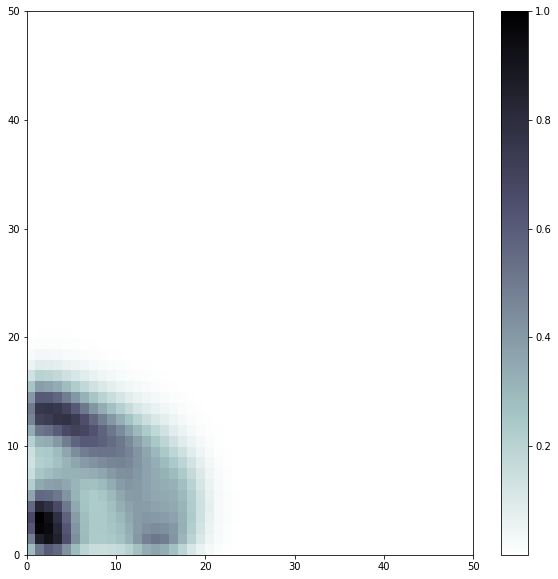

In [45]:
import matplotlib.pyplot as plt
som_output_weights = tt.map_som
som_distance_map = tt.map_som.distance_map()
plt.figure(figsize=(10, 10))
plt.pcolor(som_distance_map, cmap='bone_r')
plt.colorbar()  
#don't know if this makes sense or not


Clustering of the data. So we should cluster them based on the markers that we see

In [47]:
tt_df.describe

<bound method NDFrame.describe of           FSC-A    FSC-H        SSC-A       R780-A      B515-A      V450-A  \
0      159360.0  72832.0   930.200012  7428.466309  293.171692  296.450836   
1       32128.0  32128.0   253.870056   -38.390263   33.414497   11.098284   
2      187456.0  96576.0  1904.827393  2283.830566  617.025269  457.242798   
3       39616.0  38976.0  1119.805908   426.463043  411.432739  238.249344   
4       71040.0  63488.0   291.357330  5175.881836  114.511658  240.393906   
...         ...      ...          ...          ...         ...         ...   
99995   62272.0  59456.0   511.171417    31.842297   34.991814   16.344923   
99996   70912.0  66240.0   423.427887  5345.878906  199.315857  688.971741   
99997   50304.0  49152.0   243.388992  1959.344116   25.821211  341.822235   
99998   68992.0  65344.0   447.912842    51.814228  327.664795   61.398369   
99999   42176.0  40896.0   624.074585  2770.589844  109.668961   74.880295   

            V545-A        G56

In [93]:
from sklearn.cluster import AgglomerativeClustering
tt.meta_clustering(AgglomerativeClustering, #  cluster_class: e.g. KMeans, a cluster class, like "from sklearn.cluster import KMeans"
                   2, # min_n: e.g. 10, the min proposed number of clusters
                   13, # max_n: e.g. 31, the max proposed number of clusters
                   3, # iter_n: e.g 10, the iteration times for each number of clusters
                   resample_proportion=0.6, # resample_proportion: e.g 0.6, the proportion of re-sampling when computing clustering
                   verbose=True #verbose: e.g. False, whether print out the clustering process
                  )

At k = 2, aka. iteration = 0
	At resampling h = 0, (k = 2)
	At resampling h = 1, (k = 2)
	At resampling h = 2, (k = 2)
At k = 3, aka. iteration = 1
	At resampling h = 0, (k = 3)
	At resampling h = 1, (k = 3)
	At resampling h = 2, (k = 3)
At k = 4, aka. iteration = 2
	At resampling h = 0, (k = 4)
	At resampling h = 1, (k = 4)
	At resampling h = 2, (k = 4)
At k = 5, aka. iteration = 3
	At resampling h = 0, (k = 5)
	At resampling h = 1, (k = 5)
	At resampling h = 2, (k = 5)
At k = 6, aka. iteration = 4
	At resampling h = 0, (k = 6)
	At resampling h = 1, (k = 6)
	At resampling h = 2, (k = 6)
At k = 7, aka. iteration = 5
	At resampling h = 0, (k = 7)
	At resampling h = 1, (k = 7)
	At resampling h = 2, (k = 7)
At k = 8, aka. iteration = 6
	At resampling h = 0, (k = 8)
	At resampling h = 1, (k = 8)
	At resampling h = 2, (k = 8)
At k = 9, aka. iteration = 7
	At resampling h = 0, (k = 9)
	At resampling h = 1, (k = 9)
	At resampling h = 2, (k = 9)
At k = 10, aka. iteration = 8
	At resampling h =

In [96]:
tt.bestk #Optimal number of clusters

2

2


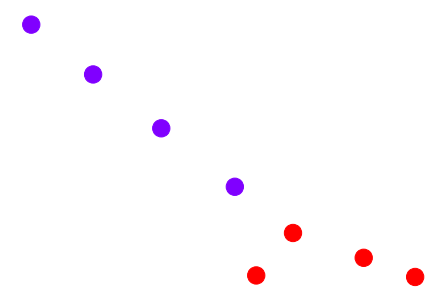

In [97]:
tt.vis(t=4,
       edge_color = 'w',# the number of total nodes = t * bestk, 
       node_size=300, 
       with_labels=False)

In [98]:
tt.labeling()

0 samples done...
10000 samples done...
20000 samples done...
30000 samples done...
40000 samples done...
50000 samples done...
60000 samples done...
70000 samples done...
80000 samples done...
90000 samples done...


In [99]:
output_df = tt.df # new column added: category
output_tf_df = tt.tf_df # new column added: category

In [100]:
output_df.head() #this code has added a column 


,FSC-A,FSC-H,SSC-A,R780-A,B515-A,V450-A,V545-A,G560-A,G610-A,G660-A,G710-A,G780-A,Time,Event #,category
0,159360.0,72832.0,930.200012,7428.466309,293.171692,296.450836,563.152344,11923.830078,25165.421875,19173.212891,52035.277344,12569.090820,0.0,0.0,1
1,32128.0,32128.0,253.870056,-38.390263,33.414497,11.098284,120.726654,74.112572,92.981125,237.716003,96.893257,8.482522,0.0,10.0,0
2,187456.0,96576.0,1904.827393,2283.830566,617.025269,457.242798,879.182556,1264.698242,5266.725098,6347.848145,8046.870605,1875.684570,0.0,20.0,1
3,39616.0,38976.0,1119.805908,426.463043,411.432739,238.249344,4318.327148,443.063507,817.831482,706.679749,1432.029785,367.095459,0.0,30.0,0
4,71040.0,63488.0,291.357330,5175.881836,114.511658,240.393906,309.248413,3722.678223,1516.909546,4350.542969,30248.910156,7712.122070,0.0,40.0,1


In [114]:
a = ['Event #', 'FSC-A','FSC-H','SSC-A']
new_output = output_df.drop(columns = a)

In [115]:
import numpy as np
np.unique(new_output.category)

array([0, 1])

In [116]:
mmm = new_output.groupby(['category']).mean()

No handles with labels found to put in legend.


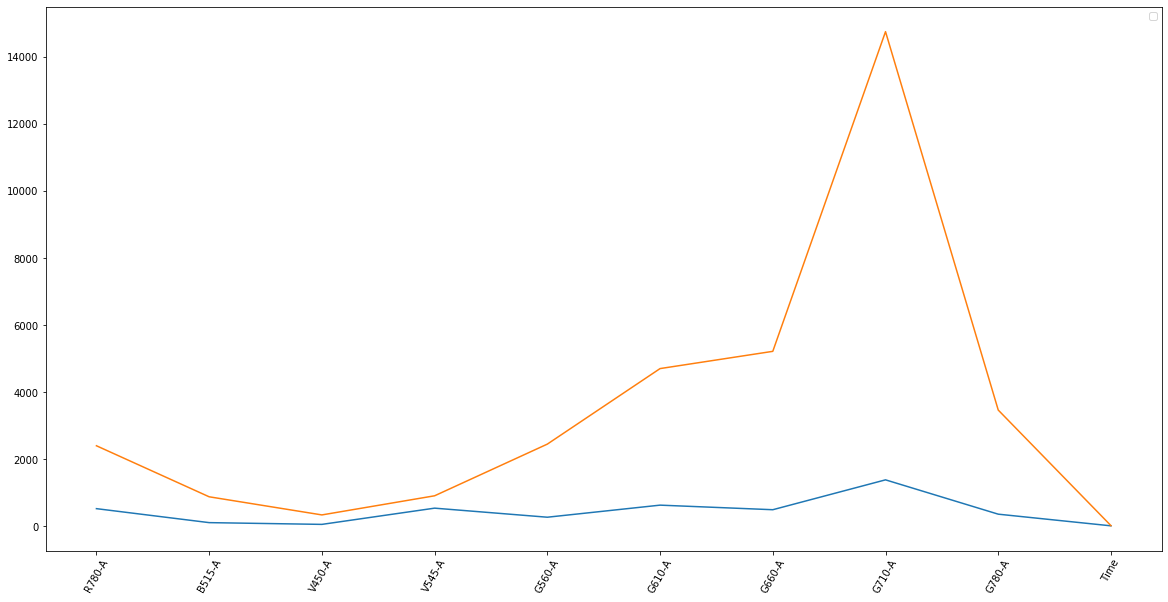

In [118]:
plt.figure(figsize=(20,10))
x = [i for i in range(10)]
my_xticks = mmm.columns
plt.xticks(x, my_xticks)
for i in range(len(mmm)):
    plt.plot(x, mmm.iloc[i])
plt.xticks(rotation=60)
plt.legend()
plt.show()


SECOND PART